# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入 mmclassification 目录

In [4]:
import os
os.chdir('mmclassification')

## 导入工具包

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 设置Matplotlib中文字体

In [4]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [5]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体


--2022-08-16 20:57:28--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  21.7MB/s    in 0.4s    

2022-08-16 20:57:29 (21.7 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 载入训练日志表格

In [5]:
log_path = 'work_dirs/mobilenet_v2_1x_fruit30/20220816_173555.log.json'

with open(log_path, "r") as f:
    json_list = f.readlines()

In [6]:
df = pd.DataFrame()
for each in json_list[2:]:
    df = df.append(eval(each), ignore_index=True)

In [7]:
df

,mode,epoch,iter,lr,accuracy_top-1,accuracy_top-3,precision,f1_score,data_time,loss,memory,time
0,val,1.0,34.0,0.00150,51.76252,76.80891,57.44844,48.75000,NaN,NaN,NaN,NaN
1,train,2.0,100.0,0.00147,NaN,NaN,NaN,NaN,0.04903,1.54189,2465.0,0.14673
2,val,2.0,34.0,0.00147,62.70872,84.23006,68.53523,61.77892,NaN,NaN,NaN,NaN
3,train,3.0,100.0,0.00144,NaN,NaN,NaN,NaN,0.05659,1.33804,2465.0,0.15433
4,val,3.0,34.0,0.00144,66.04823,85.62152,71.29103,64.78955,NaN,NaN,NaN,NaN
5,train,4.0,100.0,0.00141,NaN,NaN,NaN,NaN,0.05624,1.10880,2465.0,0.15384
6,val,4.0,34.0,0.00141,64.93507,87.75510,69.70256,64.12772,NaN,NaN,NaN,NaN
7,train,5.0,100.0,0.00138,NaN,NaN,NaN,NaN,0.05055,1.08088,2465.0,0.14798
8,val,5.0,34.0,0.00138,75.78850,93.87755,78.08059,75.12669,NaN,NaN,NaN,NaN
9,train,6.0,100.0,0.00136,NaN,NaN,NaN,NaN,0.05376,1.04706,2465.0,0.15064


In [8]:
df_train = df[df['mode']=='train']
df_test = df[df['mode']=='val']

df_train.to_csv('work_dirs/mobilenet_v2_1x_fruit30/训练日志-训练集.csv', index=False)
df_test.to_csv('work_dirs/mobilenet_v2_1x_fruit30/训练日志-测试集.csv', index=False)

## 训练集损失函数

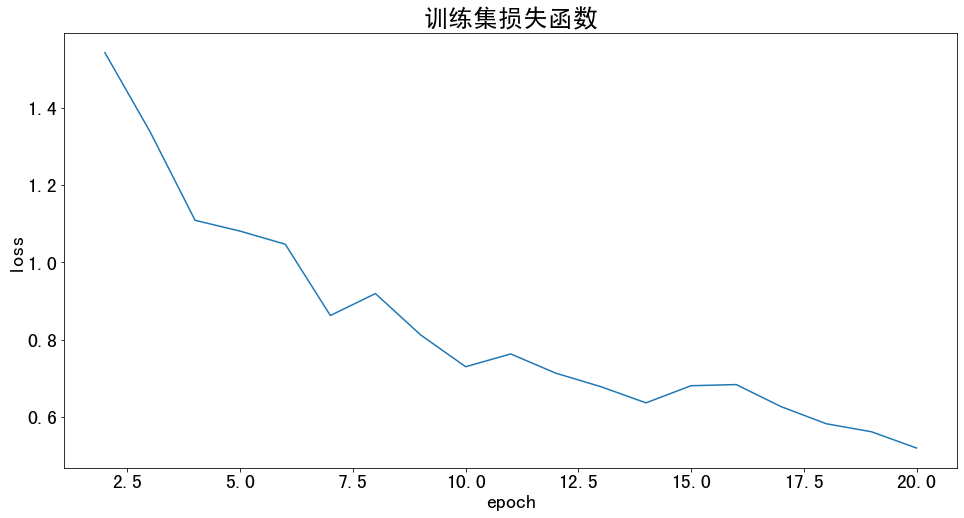

In [9]:
plt.figure(figsize=(16, 8))

x = df_train['epoch']
y = df_train['loss']

plt.plot(x, y, label='训练集')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('work_dirs/mobilenet_v2_1x_fruit30/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [13]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [18]:
metrics = ['accuracy_top-1', 'accuracy_top-3', 'precision', 'f1_score']

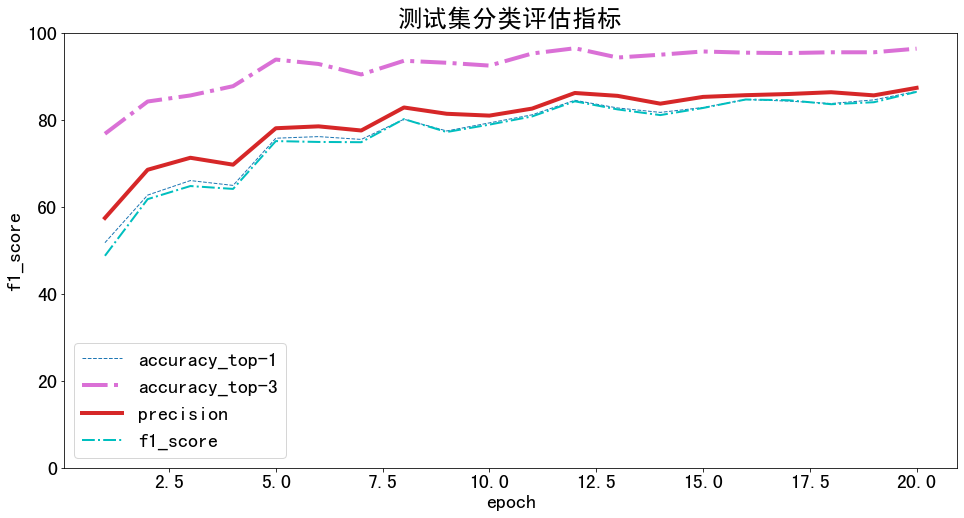

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['epoch']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集分类评估指标', fontsize=25)
plt.savefig('work_dirs/mobilenet_v2_1x_fruit30/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()